In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

matplotlib.rc('font', family='AppleGothic')
plt.rc('font',  family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

from sklearn.model_selection import GridSearchCV
from datetime import datetime

#from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier

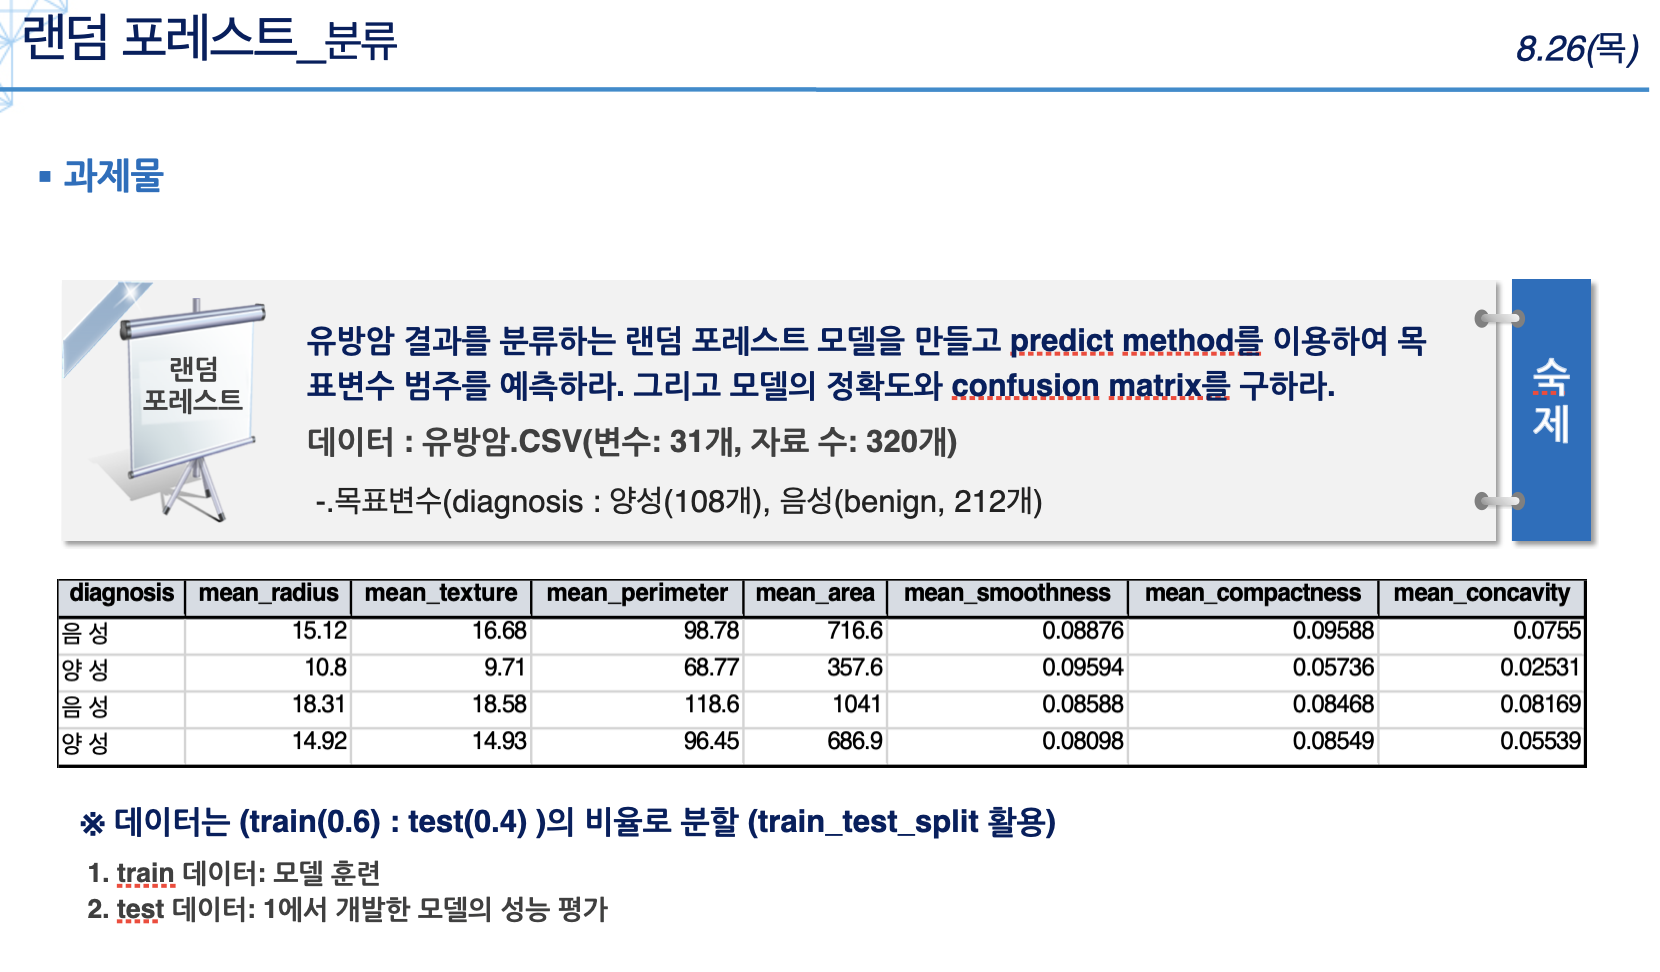

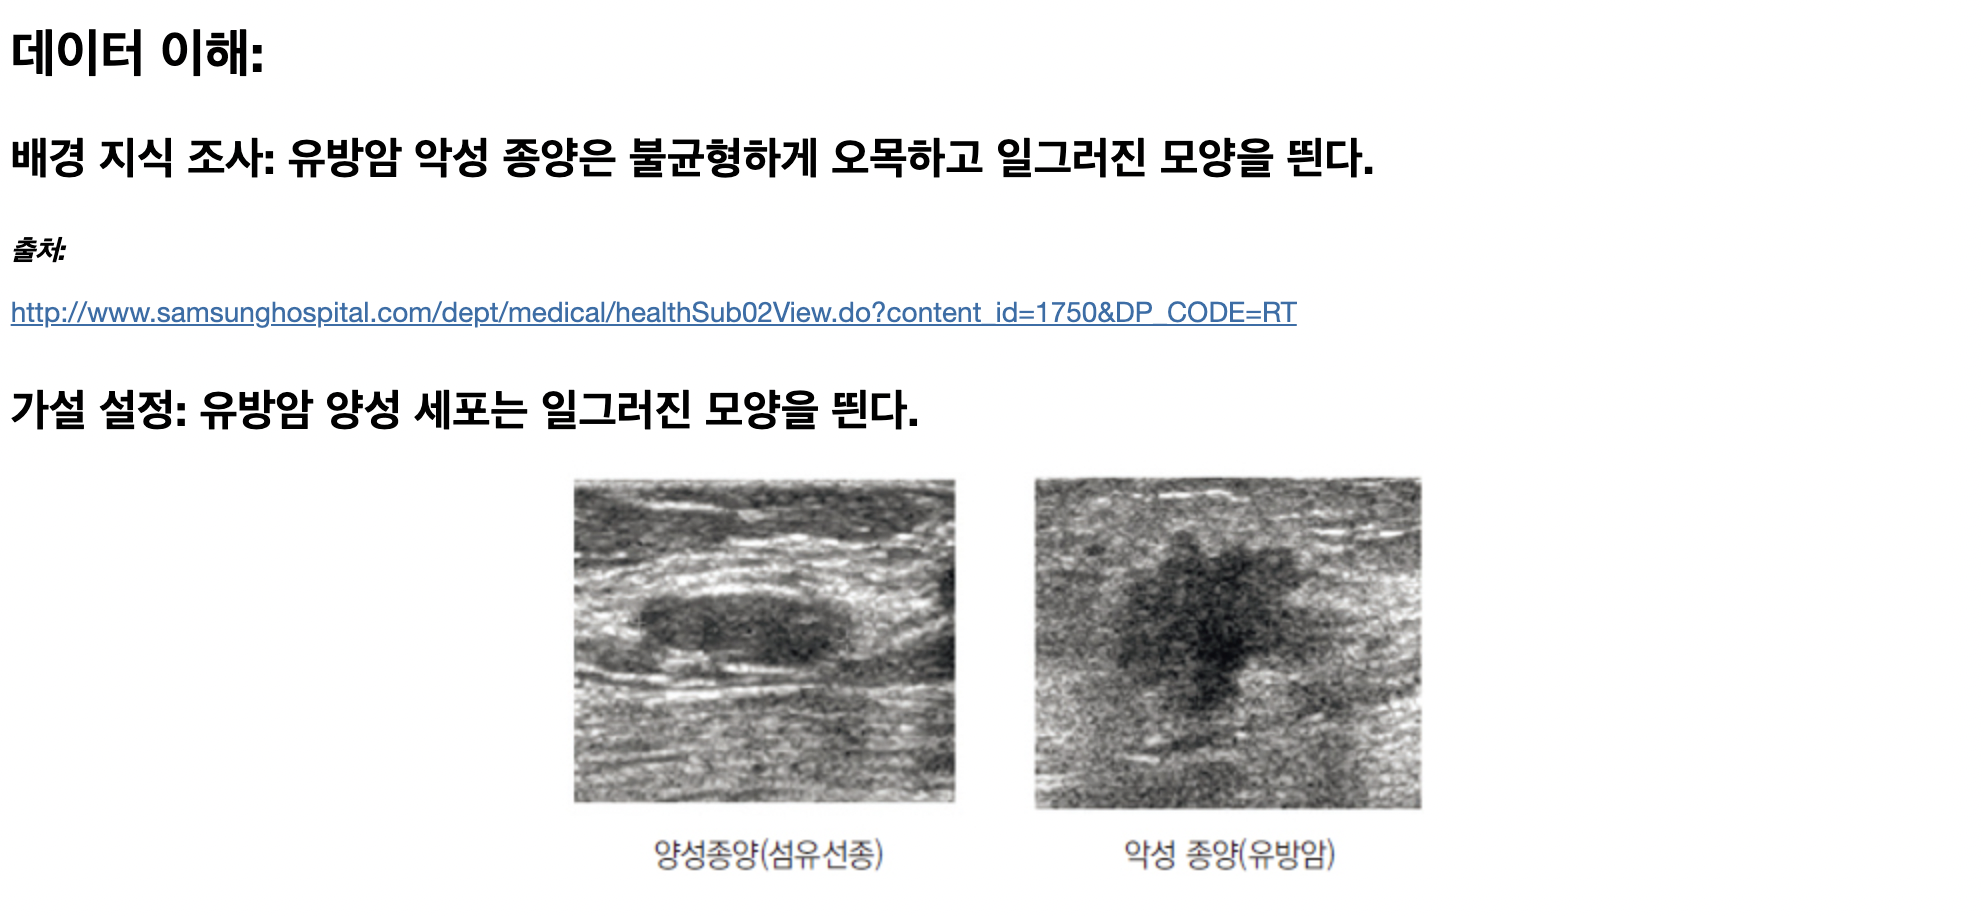

In [50]:
## Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±ÌïòÍ∏∞
df_raw = pd.read_csv('Ïú†Î∞©Ïïî.csv', engine='python', encoding='cp949')
df_raw.head(n=3)

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0        ÏùåÏÑ±        15.12         16.68           98.78      716.6   
1        ÏñëÏÑ±        10.80          9.71           68.77      357.6   
2        ÏùåÏÑ±        18.31         18.58          118.60     1041.0   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5            0.1491             0.3331           0.3327   
1       414.0            0.1436             0.1257           0.1047   
2      1410.0            0.1234             0.2445           0.3538   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  

[3 rows x 31 columns]

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

## Í≤∞Ï∏°Ïπò ÌôïÏù∏


In [4]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

## Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò: Î™©Ìëú Î≥ÄÏàòÏù∏ Ïú†Î∞©Ïïî ÏßÑÎã®Í≤∞Í≥ºÎ•º 0(ÏùåÏÑ±),1(ÏñëÏÑ±)Î°ú Î≥ÄÌôò

In [5]:
df_raw.replace({'diagnosis': 'ÏñëÏÑ±'}, 1, inplace=True)
df_raw.replace({'diagnosis': 'ÏùåÏÑ±'}, 0, inplace=True)

In [6]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw.drop("diagnosis",axis=1),df_raw["diagnosis"], test_size = 0.3, random_state=1234)
print('train x data size : {}'.format(df_train_x.shape))
print('train y data size : {}'.format(df_train_y.shape))
print('test x data size : {}'.format(df_test_x.shape))
print('test y data size : {}'.format(df_test_y.shape))

train x data size : (224, 30)
train y data size : (224,)
test x data size : (96, 30)
test y data size : (96,)


# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏

# Í∏∞Î≥∏ ÏòµÏÖòÏúºÎ°ú Î™®Îç∏ ÏÉùÏÑ±
train Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÌïú Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÍ∞Ä 100%ÏúºÎ°ú train Îç∞Ïù¥ÌÑ∞Ïóê Í≥ºÏ†ÅÌï© ÎêòÏñ¥ÏûàÎäî Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÎêúÎã§.

Îî∞ÎùºÏÑú ÌååÎùºÎ©îÌÑ∞Î•º ÏµúÏ†ÅÌôîÌï† ÌïÑÏöîÏÑ±Ïù¥ ÏûàÎã§.

In [7]:
rf_uncustomized =RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)
print("Accuracy in train set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy in test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Accuracy in train set:1.000
Accuracy in test set:0.927


# Î™®Îç∏ ÌååÎùºÎ©îÌÑ∞ Ï°∞Ï†ï 0: Ìä∏Î¶¨Í∞úÏàò =>20ÏÑ†ÌÉù

- ÏÑ†ÌÉù Ïù¥Ïú†
defaultÍ∞íÏóê Îî∞Î•¥Î©¥ Î≥ÄÏàòÍ∞úÏàòÏùò Ï†úÍ≥±Í∑ºÏù∏ np.sqrt(30)=5.5->6Í∞úÍ∞Ä ÏÑ†ÌÉùÎêúÎã§.

ÌïòÏßÄÎßå Ìä∏Î¶¨ Í∞úÏàòÍ∞Ä 6Í∞ú Ïù∏ Í≤ΩÏö∞ train, test Í∞Ñ Ï†ïÌôïÎèÑ Ï∞®Ïù¥Í∞Ä ÌÅ¨Î©∞, Ï†ïÌôïÎèÑÍ∞Ä ÎÇÆÎã§.

Îî∞ÎùºÏÇ¨ Ï†ïÌôïÎèÑÍ∞Ä Ï¶ùÍ∞ÄÎêú Ìä∏Î¶¨ Í∞úÏàò 20ÏùÑ ÏÑ†ÌÉùÌïòÏòÄÎã§.


train Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÍ≥† ÏùºÏ†ïÌïòÍ≤å Ïú†ÏßÄÎêòÎäî Íµ¨Í∞ÑÏóêÏÑú, test Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÏïÑÏßÄÎäî ÏßÄÏ†êÏù¥ÎØÄÎ°ú
Îëê Ï†ïÌôïÎèÑ Í∞Ñ Ï∞®Ïù¥Í∞Ä Ï§ÑÏñ¥Îì§Í∏∞ ÎïåÎ¨∏Ïóê ÏÑ†ÌÉùÌñàÏäµÎãàÎã§.


In [14]:
train_accuracy = []; test_accuracy =[]
para_n_tree = [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    tree = RandomForestClassifier(n_estimators=v_n_estimators,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimator"] = para_n_tree
df_accuracy_n["TrainAccuracy"]=train_accuracy
df_accuracy_n["TestAccuracy"]=test_accuracy

In [15]:
df_accuracy_n.round(3)

n_estimator  TrainAccuracy  TestAccuracy
0            10          0.991         0.865
1            20          1.000         0.917
2            30          1.000         0.927
3            40          1.000         0.927
4            50          1.000         0.927
5            60          1.000         0.927
6            70          1.000         0.927
7            80          1.000         0.927
8            90          1.000         0.938
9           100          1.000         0.927
10          110          1.000         0.927
11          120          1.000         0.927
12          130          1.000         0.938
13          140          1.000         0.927
14          150          1.000         0.927

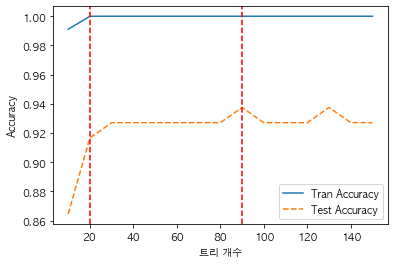

In [21]:
plt.plot(para_n_tree,train_accuracy,linestyle='-',label="Tran Accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle='--',label="Test Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Ìä∏Î¶¨ Í∞úÏàò')
plt.axvline(x=20, linestyle='--', c='r')
plt.axvline(x=90, linestyle='--', c='r')

plt.legend()

In [25]:
# oob_error =[]
# for v_n_estimator in range(1,100):
#     rf = RandomForestClassifier(n_estimators=v_n_estimator,oob_score=True,random_state=1234)
#     rf.fit(df_train_x,df_train_y)
#     oob_error.append(1-rf.oob_score_)    

/Users/dasol/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dasol/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/dasol/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dasol/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/dasol/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do 

In [51]:
#plt.plot(range(1,151),oob_error)
#plt.ylabel("oob error")
#plt.xlabel("n_estimators")

# Î™®Îç∏ ÌååÎùºÎ©îÌÑ∞ Ï°∞Ï†ï 1: max_depth ÏµúÎåÄ ÍπäÏù¥ =>5ÏÑ†ÌÉù
- ÏÑ†ÌÉù Ïù¥Ïú†

train, test Í∞íÏùò Ï∞®Ïù¥Í∞Ä ÏûëÏùÄ ÏßÄÏ†êÏù∏ 5Î•º ÏÑ†ÌÉùÌñàÏäµÎãàÎã§.

In [26]:
train_accuracy = []; test_accuracy =[]
para_depth = [depth for depth in range(1,11)]

for v_min_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_min_max_depth,n_estimators=20 ,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["TestAccuracy"]=test_accuracy
df_accuracy_depth.round(3)

Depth  TrainAccuracy  TestAccuracy
0      1          0.964         0.896
1      2          0.978         0.885
2      3          0.987         0.896
3      4          1.000         0.896
4      5          1.000         0.917
5      6          1.000         0.917
6      7          1.000         0.917
7      8          1.000         0.917
8      9          1.000         0.917
9     10          1.000         0.917

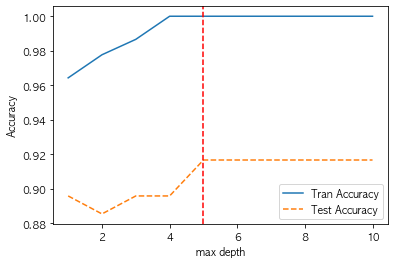

In [28]:
plt.plot(para_depth,train_accuracy,linestyle='-',label="Tran Accuracy")
plt.plot(para_depth,test_accuracy,linestyle='--',label="Test Accuracy")
plt.xlabel("max depth");plt.ylabel("Accuracy")
plt.axvline(x=5, linestyle='--', c='r')

plt.legend()

# Î™®Îç∏ ÌååÎùºÎ©îÌÑ∞ Ï°∞Ï†ï 2: Î∂ÑÎ¶¨ ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å Ïàò =>10ÏÑ†ÌÉù
Î∂ÑÎ¶¨ ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù Ï†ïÌôïÎèÑÍ∞Ä Í∞êÏÜåÌïòÎØÄÎ°ú

train, test accuracy Í∞Ä ÎÜíÏùÄ 10ÏùÑ ÏÑ†ÌÉù

In [29]:
train_accuracy = []; test_accuracy =[]
para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split=v_min_samples_split,max_depth = 5,n_estimators=20 ,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"]=train_accuracy
df_accuracy_split["TestAccuracy"]=test_accuracy
df_accuracy_split.round(3)

MinSamplesSplit  TrainAccuracy  TestAccuracy
0               10          0.987         0.938
1               20          0.982         0.906
2               30          0.982         0.896
3               40          0.982         0.896
4               50          0.978         0.896
5               60          0.964         0.854
6               70          0.969         0.854
7               80          0.964         0.865
8               90          0.964         0.896
9              100          0.964         0.896

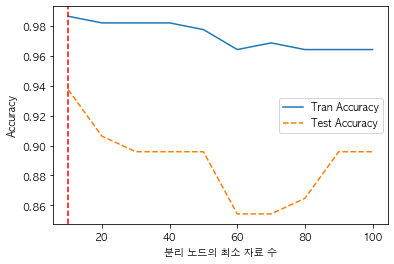

In [33]:
plt.plot(para_split,train_accuracy,linestyle='-',label="Tran Accuracy")
plt.plot(para_split,test_accuracy,linestyle='--',label="Test Accuracy")
plt.xlabel("Î∂ÑÎ¶¨ ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å Ïàò");plt.ylabel("Accuracy")
plt.axvline(x=10, linestyle='--', c='r')
plt.legend()

# Î™®Îç∏ ÌååÎùºÎ©îÌÑ∞ Ï°∞Ï†ï 3:  ÏûéÏÇ¨Í∑Ä ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å Ïàò =>30ÏÑ†ÌÉù
ÏûéÏÇ¨Í∑Ä ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù Ï†ïÌôïÎèÑÍ∞Ä Í∞êÏÜåÌïòÎØÄÎ°ú

Í∞ÄÎä•Ìïú ÏûëÏùÄ Í∞úÏàò Ï§ëÏóêÏÑú train, test accuracyÏ∞®Ïù¥Í∞Ä ÏûëÏùÄ 30ÏùÑ ÏÑ†ÌÉùÌïòÏòÄÎã§.


In [36]:
train_accuracy = []; test_accuracy =[]
para_leaf = [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,min_samples_split=10,max_depth = 4,n_estimators=20 ,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesleaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"]=train_accuracy
df_accuracy_leaf["TestAccuracy"]=test_accuracy
df_accuracy_leaf.round(3)

MinSamplesleaf  TrainAccuracy  TestAccuracy
0              10          0.973         0.896
1              20          0.973         0.906
2              30          0.969         0.906
3              40          0.964         0.875
4              50          0.969         0.885
5              60          0.969         0.885
6              70          0.955         0.885
7              80          0.625         0.750
8              90          0.625         0.750
9             100          0.625         0.750

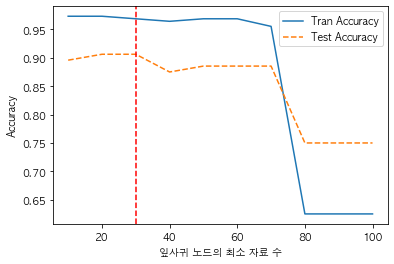

In [51]:
plt.plot(para_leaf,train_accuracy,linestyle='-',label="Tran Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle='--',label="Test Accuracy")
plt.axvline(x=30, linestyle='--', c='r')
plt.xlabel("ÏûéÏÇ¨Í∑Ä ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å Ïàò");plt.ylabel("Accuracy")
plt.legend()

# ÏµúÏ¢Ö Î™®Îç∏:

## ÌïòÏù¥Ìçº ÌååÎùºÎ©îÌÑ∞: 
n_tree =20, max_depth=5,min_samples_split=10,min_samples_leaf=30


In [52]:
rf_final = RandomForestClassifier(min_samples_leaf=30,min_samples_split=10,max_depth=4,n_estimators=100, random_state=1234)
rf_final.fit(df_train_x,df_train_y)
y_pred = rf_final.predict(df_test_x)

# ÏµúÏ¢Ö Î™®Îç∏ ÌèâÍ∞Ä

## üìåÌï¥ÏÑù
#### **Decision Tree 20Í∞ú Î™®Îç∏Ïùò ÌèâÍ∑†ÏùÑ ÎÇ∏ Ï†ïÌôïÎèÑ(Ï†ïÎ∂ÑÎ•òÏú®)Îäî 95.5%ÏúºÎ°ú Îã®Ïùº Tree Î™®Îç∏Ïùò Í≤∞Í≥ºÏù∏ 90.6%Î≥¥Îã§ Ï†ïÌôïÎèÑÍ∞Ä ÏÉÅÏäπÌïòÏòÄÎã§.**

ÏùòÌïô Î∂ÑÏïºÏù¥Îã§Î≥¥Îãà Îçî ÎÜíÏùÄ Ï†ïÌôïÎèÑÍ∞Ä ÌïÑÏöîÌï† Ïàò ÏûàÎã§.

Î™©Ìëú Î≥ÄÏàò 1Í∏∞Ï§Ä f1-scoreÏùÄ 0.833Ïù¥Îã§.

In [43]:
print("Accuracy on training set:{:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(rf_final.score(df_test_x,df_test_y)))
print("\nAccuracy on test set\n:{}".format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set:0.955
Accuracy on test set:0.917

Accuracy on test set
:[[68  4]
 [ 4 20]]
              precision    recall  f1-score   support

           0      0.944     0.944     0.944        72
           1      0.833     0.833     0.833        24

    accuracy                          0.917        96
   macro avg      0.889     0.889     0.889        96
weighted avg      0.917     0.917     0.917        96



# ÏÑ§Î™Ö Î≥ÄÏàòÏùò Ï§ëÏöîÎèÑ
## üìåÌï¥ÏÑù: Îã®Ïùº Tree Î™®Îç∏Ïùò Í≤∞Í≥ºÏôÄ ÎπÑÍµê

### Ïñ¥Îñ§ ÏÑ§Î™Ö Î≥ÄÏàòÍ∞Ä Ïú†Î∞©Ïïî ÏßÑÎã®Ïóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÍ∞Ä?

1.  RandomForest Í≤∞Í≥º ÏÑ§Î™ÖÎ≥ÄÏàò Ï§ëÏöîÎèÑÍ∞Ä Î™®Îëê 16%Ïù¥ÌïòÎ°ú ÏûëÏùÄ Í∞íÏùÑ Í∞ÄÏßÑÎã§.

    Ïù¥Îäî Îã®Ïùº Tree Ïú†Î∞©Ïïî ÏñëÏÑ± ÏßÑÎã®Ïóê ÏÑ∏Ìè¨Ïùò ÌèâÍ∑† Ïò§Î™©Ìïú Ï†êÏùò Ïàò(mean concave points)Ïùò ÏÉÅÎåÄÏ†Å Ï§ëÏöîÎèÑÍ∞Ä 77.2%Î°ú Îß§Ïö∞ ÎÜíÏïòÎçò Í≤ÉÍ≥º ÏÉÅÎ∞òÎêú Í≤∞Í≥ºÏù¥Îã§.

    Ïù¥Î•º ÌÜµÌï¥ RandomForestÎäî Îç∞Ïù¥ÌÑ∞ÏôÄ Î≥ÄÏàòÎ•º Î≥µÏõêÏ∂îÏ∂úÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Îã®Ïùº TreeÎ™®Îç∏Î≥¥Îã§ ÏïàÏ†ïÏ†ÅÏù¥Îã§. 
    
    Îî∞ÎùºÏÑú Ïú†Î∞©Ïïî ÏñëÏÑ± ÏßÑÎã®Ïóê

    worst_perimeter, 	
    mean_concave_points, 	
    mean_concavity, 	
    worst_concave_points,	
    worst_radius,
    worst_area,
    mean_perimeter,	
    worst_concavity,	
    mean_area,	
    mean_radius 
    Î≥ÄÏàòÎì§Ïù¥ ÎπÑÏä∑Ìïú ÏòÅÌñ•Î†•ÏùÑ ÎÅºÏπòÎäî Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÎêúÎã§.


2. errorÎ≥ÄÏàòÎì§ÏùÄ Îã®Ïùº Tree Í≤∞Í≥ºÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÏÉÅÎåÄÏ†Å Ï§ëÏöîÎèÑÍ∞Ä Í±∞Ïùò 0Ïóê ÏàòÎ†¥ÌïúÎã§.
    Ïù¥Îäî Î≥ÄÏàòÎì§Ïùò Ï∏°Ï†ï Ïò§Ï∞®Ïù¥ÎØÄÎ°ú Ï§ëÏöîÎèÑÍ∞Ä ÏûëÏïÑÏïºÌïòÎäî ÎãπÏó∞Ìûà ÏòàÏÉÅ Í∞ÄÎä•Ìïú Í≤∞Í≥ºÏù¥Îã§.
    


In [45]:
v_feature_name=df_train_x.columns
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)


Feature  Importance
22          worst_perimeter       0.160
7       mean_concave_points       0.157
6            mean_concavity       0.134
27     worst_concave_points       0.112
20             worst_radius       0.092
23               worst_area       0.078
2            mean_perimeter       0.054
26          worst_concavity       0.053
3                 mean_area       0.041
0               mean_radius       0.032
13               area_error       0.027
12          perimeter_error       0.017
5          mean_compactness       0.011
8             mean_symmetry       0.009
17     concave_points_error       0.008
4           mean_smoothness       0.004
21            worst_texture       0.003
10             radius_error       0.002
28           worst_symmetry       0.002
1              mean_texture       0.002
24         worst_smoothness       0.001
25        worst_compactness       0.001
16          concavity_error       0.000
14         smoothness_error       0.000
15        compactness_error       0.000
9    mean_fractal_dimension       0.000
18           symmetry_error       0.000
19  fractal_dimension_error       0.000
11            texture_error       0.000
29  worst_fractal_dimension       0.000

Text(0, 0.5, 'ÏÑ§Î™ÖÎ≥ÄÏàò')

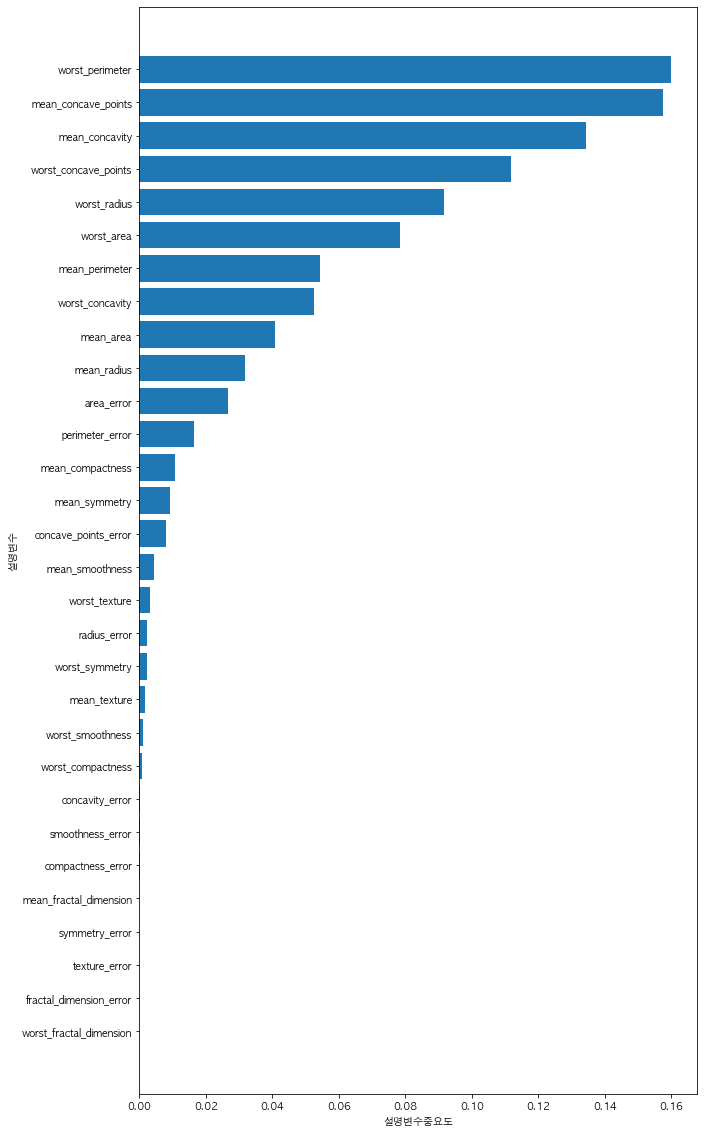

In [48]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.figure(figsize=(10,20))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("ÏÑ§Î™ÖÎ≥ÄÏàòÏ§ëÏöîÎèÑ")
plt.ylabel("ÏÑ§Î™ÖÎ≥ÄÏàò")